# 6. Fourierova transformácia
Fourierova transformácia (FT) je dôležitým nástrojom pri úprave signálov, ktoré rozkladá na
jednotlivé harmonické zložky. Hovoríme o prechode z časovej (rsp. priestorovej) oblasti do
frekvenčnej oblasti. Pre lepšie pochopenie uvedieme najskôr príklad použitia FT na signále šíriacom
sa pozdĺž jedného rozmeru zloženom z dvoch harmonických zložiek:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, transform

from scipy import fft

In [2]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

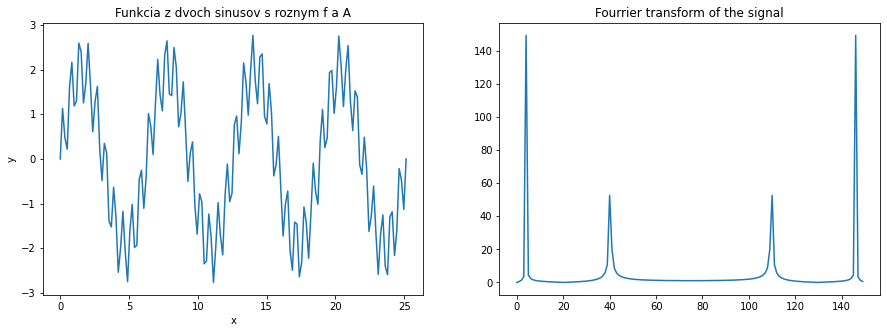

In [3]:
x = np.linspace(0, 8*np.pi, 150)

y_1 = 2*np.sin(x)
y_2 = 0.8*np.sin(10*x)

y = y_1 + y_2

y_f = fft.fft(y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcia z dvoch sinusov s roznym f a A')
plt.subplot(122)
plt.title('Fourrier transform of the signal')
plt.plot(np.abs(y_f))

Úpravou frekvenčného spektra pred vykonaním inverznej Fourierovej transformácie môžeme zo
signálu odfiltrovať niektoré harmonické zložky:

/home/miro/anaconda3/envs/computer_vision/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

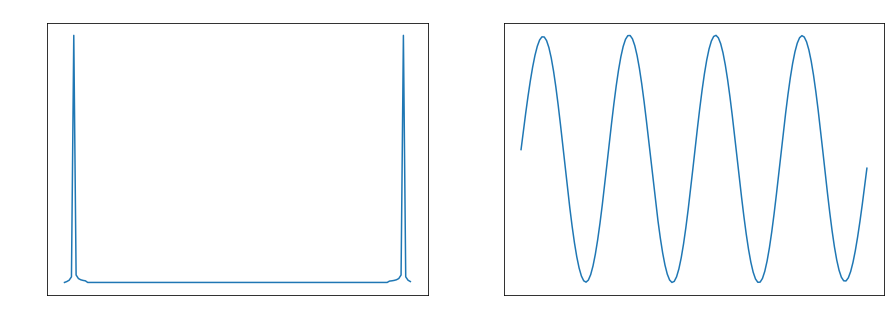

In [14]:
y_f_removed_f = y_f
y_f_removed_f[10:140] = 0  + 0.j
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.abs(y_f))
plt.xlabel('y')
plt.ylabel('f')
plt.title('Frekvencne spektrum s jednym odstranenym peakom')
plt.subplot(122)
y_t = fft.ifft(y_f)
plt.plot(x,y_t)
plt.xlabel('x')
plt.ylabel('y')


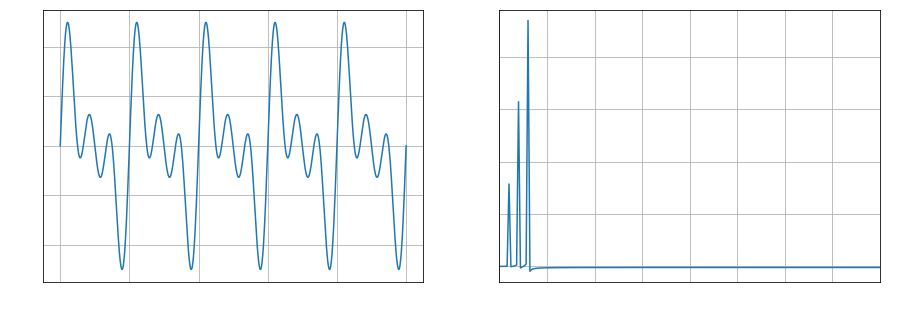

In [16]:
N = 1000
Fs  = 100 # Hz vzorkovacia frekvencia

T = N/Fs

x = np.linspace(0, 10*np.pi, N)

y_1 = np.sin(x) + np.sin(2*x) + np.sin(3*x)

f = np.linspace(0,N-1,N)*Fs/N

plt.figure(figsize=(15,5))
y_f = fft.fft(y_1)

plt.subplot(121)
plt.plot(y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(122)
plt.plot(f,np.real(y_f))
plt.axis([0,20,np.min(np.real(y_f))-1,np.max(np.real(y_f))+1])
plt.xlabel('Hz')
plt.ylabel('Y*Hz^-1')

plt.grid()

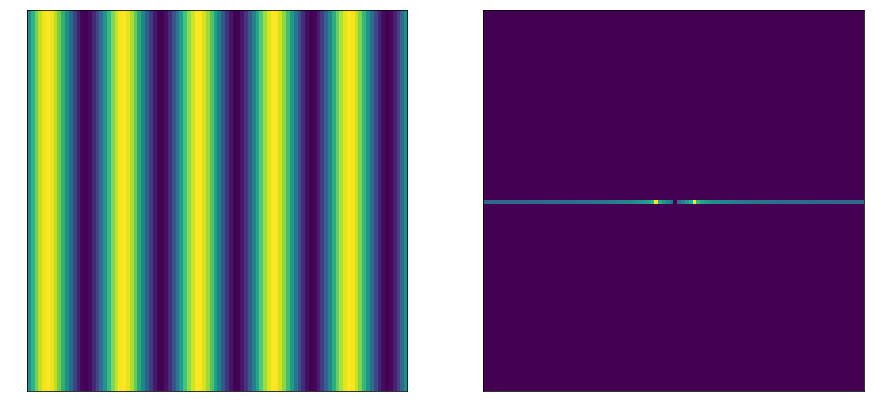

In [20]:
N=100
x = np.array([np.linspace(0,10*np.pi,N)])
y = np.sin(x)
im = np.repeat(y, 100,axis=0)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
im_fft= fft.fft2(im)

zero_center_im_fft = fft.fftshift(im_fft)

plt.imshow(np.log(1+np.abs(zero_center_im_fft)))

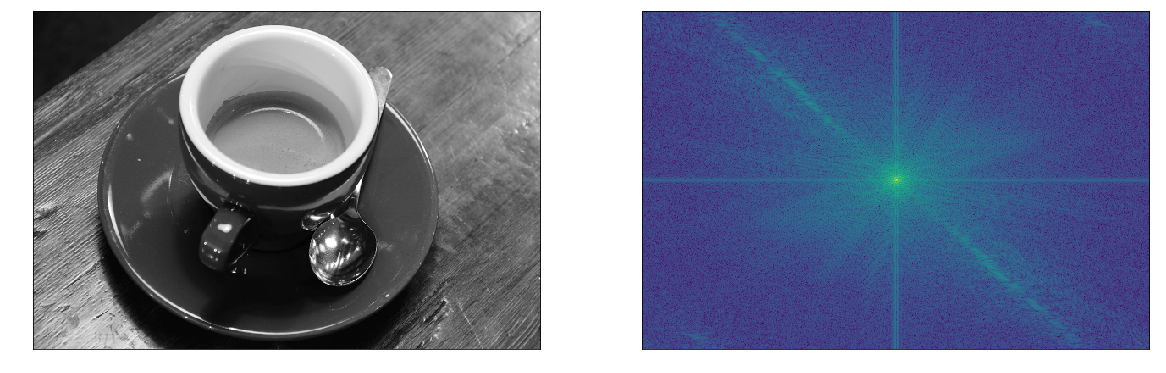

In [21]:
im = rgb2gray(data.coffee())
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))

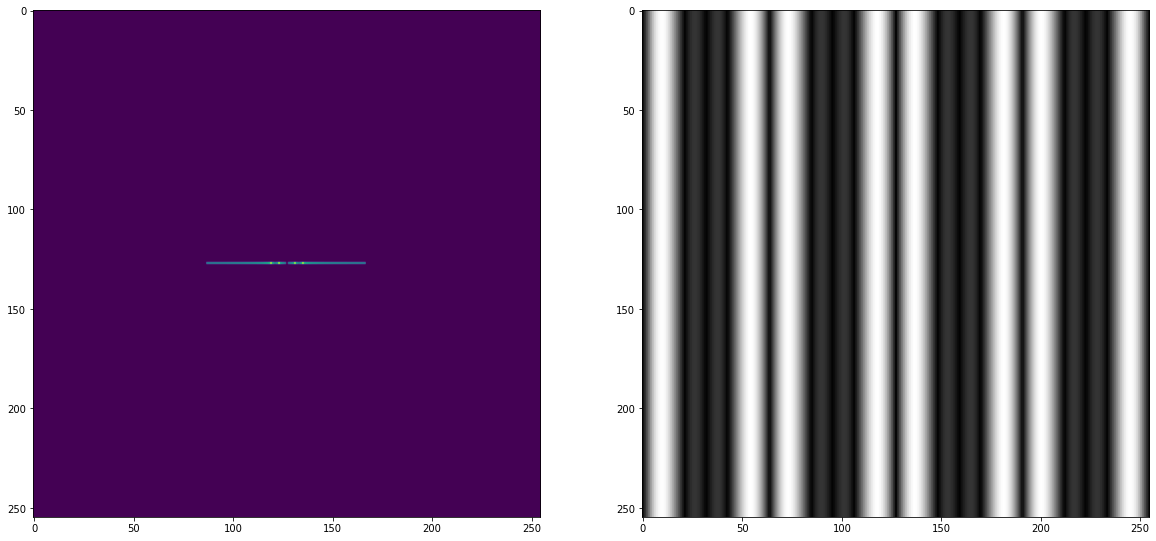

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = np.zeros(zero_center_im_fft.shape,dtype=np.complex)

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] =\
    zero_center_im_fft[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

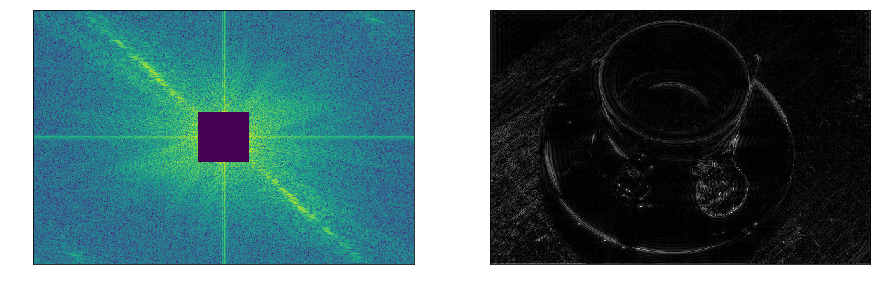

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = zero_center_im_fft

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')



Text(0.5, 1.0, 'Amplitudove spektrum, zvacsene')

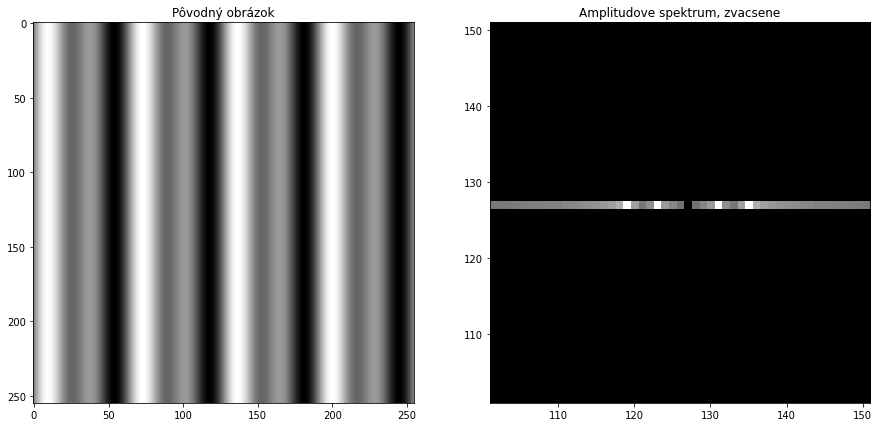

In [4]:
# Dokoncit cvicenie v knihe s obrazkami z knihy
# Dorobit bonusovu ulohu

N = 255
x = np.array([np.linspace(0,8*np.pi,N)])
y = np.sin(x) + np.sin(2*x)
im = np.repeat(y, 255, axis=0)

im_fft = fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
F2 = np.log(1+np.abs(zero_center_im_fft))

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im, cmap = "gray")
plt.title("Pôvodný obrázok")
plt.subplot(122)
plt.imshow(F2, cmap = "gray")
plt.xlim(101,151)
plt.ylim(101,151)
plt.title("Amplitudove spektrum, zvacsene")

Text(0.5, 1.0, 'Filtrovany obrazok')

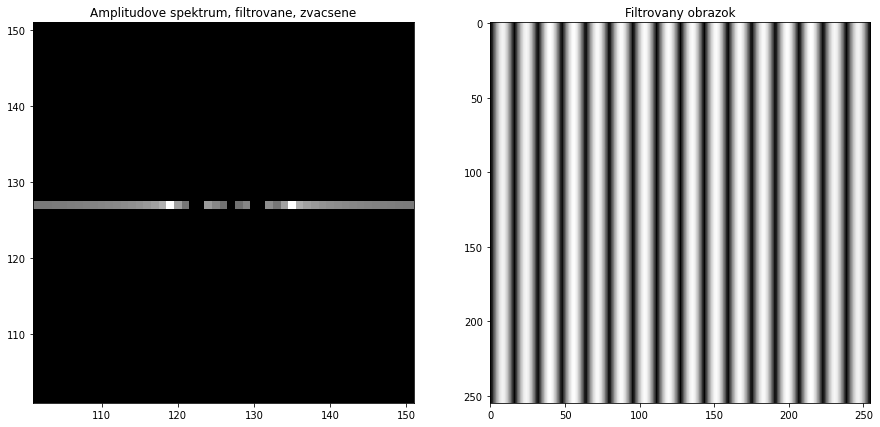

In [12]:
zero_center_im_fft[126:128,122:124] = 0 + 0.j
zero_center_im_fft[126:128,130:132] = 0 + 0.j

F2 = np.log(1+np.abs(zero_center_im_fft))
F = fft.ifftshift(zero_center_im_fft)
Y = fft.ifft2(F)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(F2, cmap = "gray")
plt.xlim(101,151)
plt.ylim(101,151)
plt.title("Amplitudove spektrum, filtrovane, zvacsene")
plt.subplot(122)
plt.imshow(np.abs(Y), cmap = "gray")
plt.title("Filtrovany obrazok")

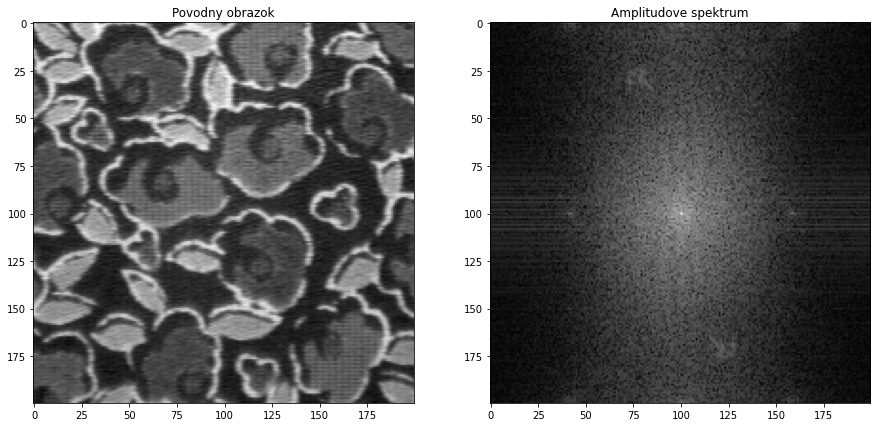

In [13]:
img = rgb2gray(plt.imread("./imgs/fabric.png"))
img = img[140:340,220:420]
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Povodny obrazok")
plt.imshow(img, cmap = "gray")
plt.subplot(122)
plt.title("Amplitudove spektrum")
img_fft = fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
plt.imshow(np.log(1+np.abs(zero_center_img_fft)), cmap="gray")

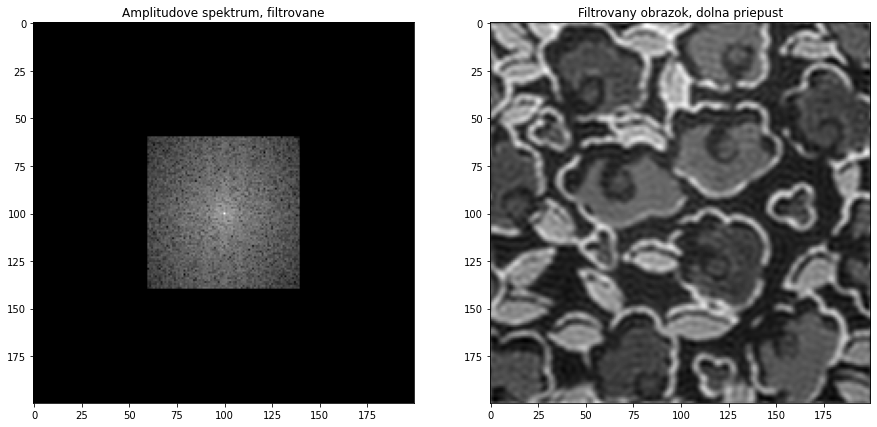

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Amplitudove spektrum, filtrovane")
pxls = 40

img_fft= fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
img_size = img.shape
filtered_spectrum = np.zeros(zero_center_img_fft.shape,dtype=np.complex)

filtered_spectrum[img_size[0]//2-pxls:img_size[0]//2+pxls,img_size[1]//2-pxls:img_size[1]//2+pxls] =\
    zero_center_img_fft[img_size[0]//2-pxls:img_size[0]//2+pxls,img_size[1]//2-pxls:img_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)), cmap="gray")
plt.subplot(122)
plt.title("Filtrovany obrazok, dolna priepust")
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

UsageError: Line magic function `%##` not found.


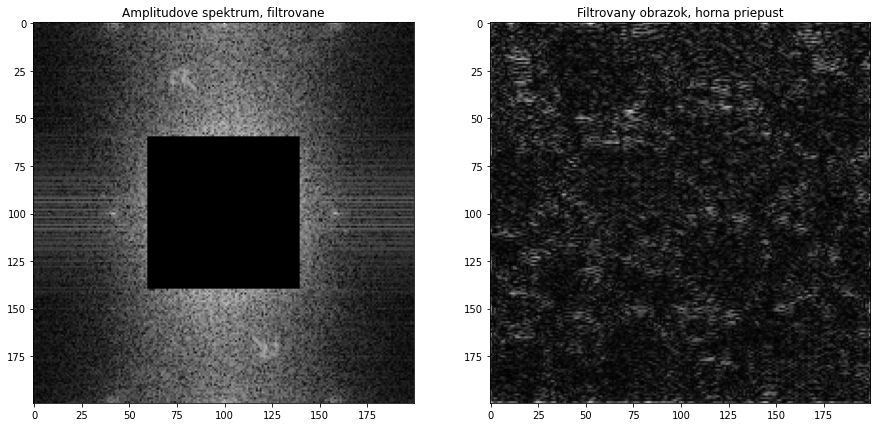

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Amplitudove spektrum, filtrovane")
pxls = 40

img_fft= fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
img_size = img.shape
filtered_spectrum = zero_center_img_fft

filtered_spectrum[img_size[0]//2-pxls:img_size[0]//2+pxls,img_size[1]//2-pxls:img_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)), cmap="gray")
plt.subplot(122)
plt.title("Filtrovany obrazok, horna priepust")
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

c:\users\user\anaconda3\envs\computer_vision_2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Polohy hladaneho vzoru')

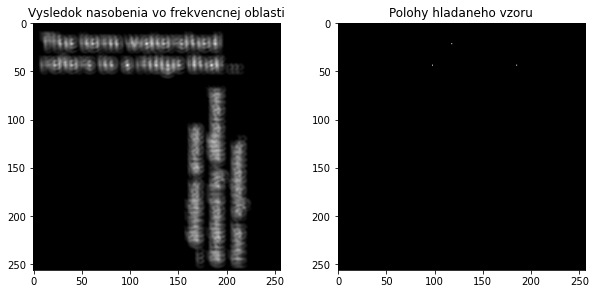

In [19]:
bw = rgb2gray(plt.imread("./imgs/text.png"))
a = np.zeros(bw.shape)
a[0:13, 0:10] = transform.rotate(bw[32:45,88:98], 180)
C = np.real(fft.ifft2(fft.fft2(bw)*fft.fft2(a)))

plt.figure(figsize=(10,10))
plt.subplot(223)
plt.imshow(C,cmap="gray")
plt.title("Vysledok nasobenia vo frekvencnej oblasti")
plt.subplot(224)
plt.imshow(C > 0.9*np.max(C), cmap="gray")
plt.title("Polohy hladaneho vzoru")

Text(0.5, 1.0, 'Filtrovany obrazok')

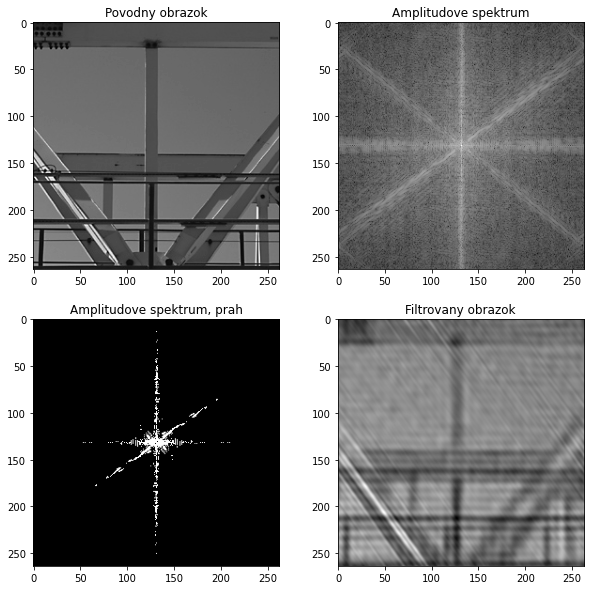

In [21]:
Y = rgb2gray(plt.imread("./imgs/gantrycrane.png"))
Y = Y[:,69:332]

F = fft.fft2(Y)
F_shift = fft.fftshift(F)
F2 = np.log(np.abs(F_shift))

thresh = np.log(np.abs(F_shift)) > (0.45*np.max(np.log(np.abs(F_shift))))

circ_filter = np.zeros(F.shape)
radius = 30
s1, s2 = circ_filter.shape

for i in range(0, s1):
    for j in range(0, s2):
        if np.sqrt((i - s1//2 + j - s2//2)**2) < radius:
            circ_filter[i][j] = 1

F3 = F_shift * thresh * circ_filter
X = fft.ifft2(fft.ifftshift(F3))

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(Y, cmap = "gray")
plt.title("Povodny obrazok")
plt.subplot(222)
plt.imshow(F2, cmap="gray")
plt.title("Amplitudove spektrum")
plt.subplot(223)
plt.imshow(thresh, cmap = "gray")
plt.title("Amplitudove spektrum, prah")
plt.subplot(224)
plt.imshow(np.real(X), cmap="gray")
plt.title("Filtrovany obrazok")

c:\users\user\anaconda3\envs\computer_vision_2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


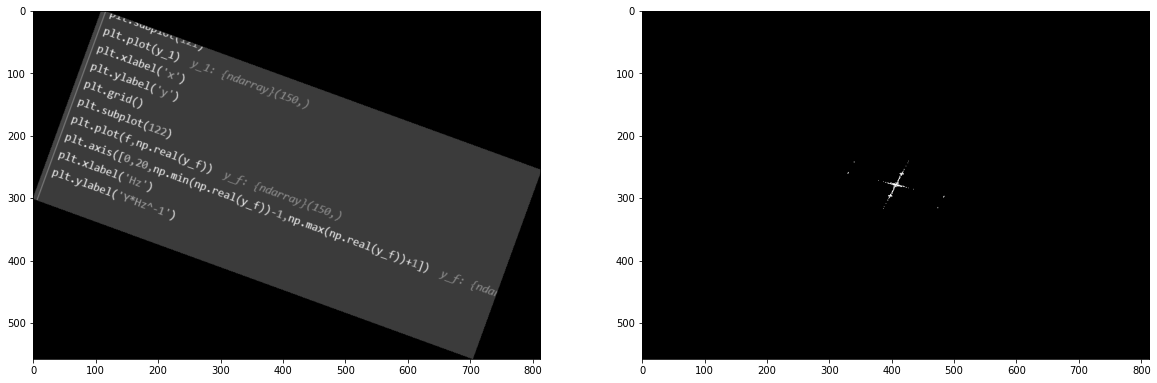

In [30]:
#BONUS

code = (rgb2gray(plt.imread("./imgs/code.png")) * 255).astype(dtype= np.uint8)
axis = transform.rotate(code, -20, resize= True)

plt.figure(figsize=(20, 15))
plt.subplot(121)
plt.imshow(axis,cmap= 'gray')
plt.subplot(122)
textFft = np.fft.fftshift(np.fft.fft2(axis))
realTextFft = np.log(1 + np.abs(textFft))
plt.imshow(realTextFft > 0.6 * np.max(realTextFft), cmap= 'gray')